In [110]:
import pandas as pd
import matplotlib.pyplot as plt


In [111]:
df = pd.read_csv("data/manual_feedback_preprocessed.csv")
display(df)

,Student,Exercise,"Q1-On a scale of 1 to 10, how mentally demanding was the exercise",Q2-I had to put a lot of effort into this exercise (scale 1-5),Q3-I am satisfied with my performance on this exercise (scale 1-5),Q4-I felt stressed while completing the exercise (scale 1-5),Q5-The provided AI feedback was helpful (scale 1-5),Feedback #,Timestamp,Objective,...,Error Label,KC Label,Compiler output (compiled or error),Final outcome,%Completeness,Umar,David,Brinleigh,Unnamed: 20,Unnamed: 21
0,1,547,8,4,5,3,5.0,1,NaN,Student already wrote the complete code for th...,...,"Logical, Syntax, Understandability","Looping Constructs, Using Clear Method and Var...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,547,8,4,5,3,5.0,2,NaN,Student had implemented the function correctl...,...,"Understandability, Efficiency","Using Docstrings and Comments, Testing Code an...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,568,9,5,5,4,5.0,1,NaN,The student had made a fair amount of progress...,...,"Logical, Understandability","Recursion Concepts, Recursive Formula, Using ...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,568,9,5,5,4,5.0,2,NaN,Student started using recursion instead of whi...,...,"Logical, Understandability","Recursion Concepts, Testing Code and Validatin...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,568,9,5,5,4,5.0,3,NaN,Student seems to be stuck in building the corr...,...,"Logical, Efficiency","Recursion Concepts, Recursive Formula, Testing...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,19,760,2,2,5,1,5.0,1,NaN,There's no issue in the Student's code. One AI...,...,"Logical, Syntax","String Indexing and Slicing, String Methods, L...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,19,1949,3,4,4,2,5.0,1,NaN,The Student knows the OOP concepts and impleme...,...,"Logical, Syntax","Defining a Class, Initializing and Storing Obj...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,19,2135,2,3,5,1,5.0,1,NaN,"The code is still incomplete, unfinished `stop...",...,"Logical, Syntax","Using the time Module, Defining a Class, Insta...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,19,2135,2,3,5,1,5.0,2,NaN,"After about three minutes, the Student success...",...,"Logical, Syntax","Using the time Module, Defining a Class, Insta...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Group the data by student and exercise to get a count of AI usage

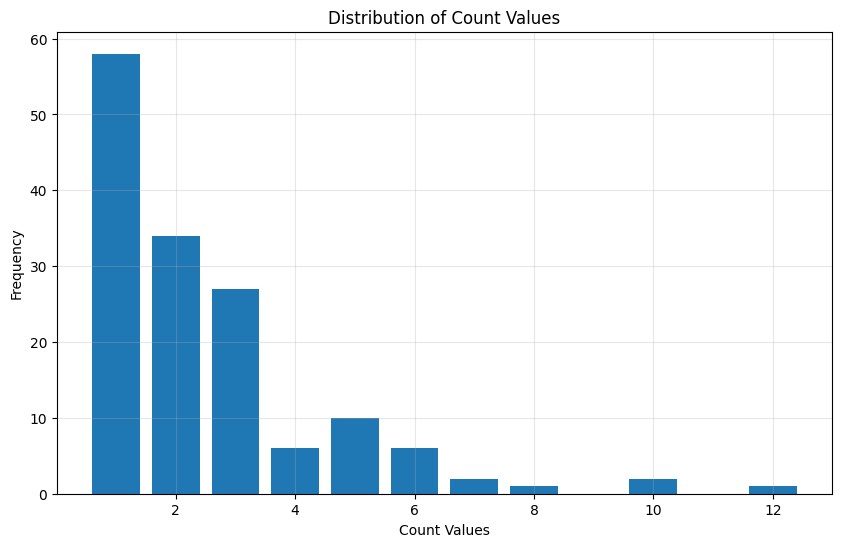

In [112]:

# Group by Student and Exercise and get counts
grouped_counts = df.groupby(['Student', 'Exercise']).size().reset_index(name='Count')

# Also show summary statistics of the counts
count_summary = grouped_counts['Count'].value_counts().sort_index()

# Create a bar graph of the various counts
plt.figure(figsize=(10, 6))
plt.bar(count_summary.index, count_summary.values)
plt.xlabel('Count Values')
plt.ylabel('Frequency')
plt.title('Distribution of Count Values')
plt.grid(True, alpha=0.3)
plt.show()


In [113]:
top_usage_attempts = grouped_counts.sort_values(by="Count", ascending=False)[:10]
display(top_usage_attempts)


,Student,Exercise,Count
124,16,683,12
93,12,586,10
14,2,1949,10
98,12,2171,8
63,8,586,7
86,11,683,7
30,4,683,6
104,14,547,6
73,9,2135,6
126,16,1949,6


## Get the usage counts of the top three AI problem attempt students


In [114]:
top_attempt_usage_students = top_usage_attempts[:3]["Student"].values
print(top_attempt_usage_students)

for student in top_attempt_usage_students:
    # get all counts for the students
    student_counts = grouped_counts.query(f"Student == {student}")

    print(student_counts)

    # get the totals
    print("AVERAGE USAGE")
    average_usage = student_counts["Count"].mean()
    print(average_usage)

    print("-" * 30)


[16 12  2]
     Student  Exercise  Count
120       16       434      1
121       16       547      3
122       16       568      3
123       16       586      1
124       16       683     12
125       16       760      2
126       16      1949      6
127       16      2135      3
128       16      2171      2
AVERAGE USAGE
3.6666666666666665
------------------------------
    Student  Exercise  Count
91       12       434      2
92       12       547      5
93       12       586     10
94       12       683      6
95       12       760      2
96       12      1949      4
97       12      2135      5
98       12      2171      8
AVERAGE USAGE
5.25
------------------------------
    Student  Exercise  Count
8         2       434      1
9         2       547      3
10        2       568      2
11        2       586      1
12        2       683      3
13        2       760      2
14        2      1949     10
15        2      2135      3
16        2      2171      3
AVERAGE USAGE
3.11111111

## Student 2 spikes in usage for problem 1949 get their attempt data

In [115]:
student_2_attempt = df.query("Student ==2 and Exercise ==1949")
display(student_2_attempt)

print("\nError Labels:")
error_labels = student_2_attempt['Error Label'].str.split(', ')
print(error_labels)

print("\nKC Labels")
kc_labels = student_2_attempt['KC Label'].str.split(', ')
print(kc_labels)


,Student,Exercise,"Q1-On a scale of 1 to 10, how mentally demanding was the exercise",Q2-I had to put a lot of effort into this exercise (scale 1-5),Q3-I am satisfied with my performance on this exercise (scale 1-5),Q4-I felt stressed while completing the exercise (scale 1-5),Q5-The provided AI feedback was helpful (scale 1-5),Feedback #,Timestamp,Objective,...,Error Label,KC Label,Compiler output (compiled or error),Final outcome,%Completeness,Umar,David,Brinleigh,Unnamed: 20,Unnamed: 21
34,2,1949,5,3,4,2,4.0,1,NaN,Student started writing the code for the Shape...,...,"Syntax, Understandability","Defining a Class, Using self to Access Attribu...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2,1949,5,3,4,2,4.0,2,NaN,After fixing the Square class definition and i...,...,Syntax,"Defining a Class, Using self to Access Attribu...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2,1949,5,3,4,2,4.0,3,"class Shape():\n def __init__(self, color):...",Student still have a improper call of parent c...,...,Logical,"Defining a Class, Using self to Access Attribu...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2,1949,5,3,4,2,4.0,4,NaN,Student made a syntax error by trying to figur...,...,Syntax,"Initializing and Storing Object State,\nUsing ...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2,1949,5,3,4,2,4.0,5,NaN,Student removed the syntax error but still try...,...,Logical,"Initializing and Storing Object State,\nUsing ...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2,1949,5,3,4,2,4.0,6,NaN,Student have now created instace of the `Squar...,...,"Syntax,Logical","Initializing and Storing Object State,\nUsing ...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2,1949,5,3,4,2,4.0,7,NaN,Student made two syntax errors and is mainly s...,...,"Syntax, Logical, Understandability","Initializing and Storing Object State,\nUsing ...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2,1949,5,3,4,2,4.0,8,NaN,"Student had not added the `color` arguments, t...",...,"Syntax, Logical, Understandability, Efficiency","Initializing and Storing Object State,\nUsing ...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2,1949,5,3,4,2,4.0,9,NaN,Student added the `color` argument here. but t...,...,"Syntax, Logical, Understandability, Efficiency","Initializing and Storing Object State,\nUsing ...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2,1949,5,3,4,2,4.0,10,NaN,Student added the `color` argument and fixed t...,...,"Syntax, Logical, Understandability, Efficiency","Initializing and Storing Object State,\nUsing ...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Error Labels:
34                         [Syntax, Understandability]
35                                            [Syntax]
36                                           [Logical]
37                                            [Syntax]
38                                           [Logical]
39                                    [Syntax,Logical]
40                [Syntax, Logical, Understandability]
41    [Syntax, Logical, Understandability, Efficiency]
42    [Syntax, Logical, Understandability, Efficiency]
43    [Syntax, Logical, Understandability, Efficiency]
Name: Error Label, dtype: object

KC Labels
34    [Defining a Class, Using self to Access Attrib...
35    [Defining a Class, Using self to Access Attrib...
36    [Defining a Class, Using self to Access Attrib...
37    [Initializing and Storing Object State,\nUsing...
38    [Initializing and Storing Object State,\nUsing...
39    [Initializing and Storing Object State,\nUsing...
40    [Initializing and Storing Object State,\nUsing...

## Get Average Usage Counts for all students and get the Extremes

In [116]:
average_usage_counts = grouped_counts.drop(columns="Exercise").groupby("Student").mean()
display(average_usage_counts)

# Extract the top User
top_user = average_usage_counts.sort_values(by="Count", ascending=False).iloc[0]
top_user_id = int(top_user.name)
print(f"Top User: {top_user_id}")

,Count
Student,
1,2.750000
2,3.111111
3,1.888889
4,3.111111
5,1.333333
6,1.444444
7,2.428571
8,2.250000
9,2.571429


Top User: 12


Looking at the user request, I need to:

1. Get the problems (exercises) solved by the top_user_id (which is 12)
2. Print their responses to the survey questions



In [121]:
# Get all problems solved by the top user
top_user_problems = df.query(f"Student == {top_user_id}")

print(f"Problems solved by top user (Student {top_user_id}):")
student_exercises = df.query(f"Student == {top_user_id}")['Exercise'].unique()
print(f"Exercises: {student_exercises}")
print(f"Total AI Usage: {len(top_user_problems)}")

print("-" * 30)
print("RESPONSES TO SURVEY QUESTIONS:")
print("-" * 50)

# Get the question columns
question_columns = [col for col in top_user_problems.columns if col.startswith('Q')]
q1_label = "Q1-On a scale of 1 to 10, how mentally demanding was the exercise"
# Print responses for each attempt and get the most mentally demanding question

most_mentally_demanding_question = student_exercises[0]
for id in student_exercises:
    print(f"Exercise {id}:")

    # we only need the first one as the question responses are all identical
    response = top_user_problems.query(f"Exercise == {id}").iloc[0]
    if response[q1_label] > top_user_problems.query(f"Exercise == {most_mentally_demanding_question}").iloc[0][
        q1_label]:
        most_mentally_demanding_question = id

    for q_col in question_columns:
        # Clean up the column name for better readability
        print(f"{q_col}: {response[q_col]}")
    print("-" * 30)

print("\n" * 3)
print(f"Most Mentally Demanding Exercise: {most_mentally_demanding_question}")


Problems solved by top user (Student 12):
Exercises: [ 434  547  586  683  760 1949 2135 2171]
Total AI Usage: 42
------------------------------
RESPONSES TO SURVEY QUESTIONS:
--------------------------------------------------
Exercise 434:
Q1-On a scale of 1 to 10, how mentally demanding was the exercise: 2
Q2-I had to put a lot of effort into this exercise (scale 1-5): 2
Q3-I am satisfied with my performance on this exercise (scale 1-5): 5
Q4-I felt stressed while completing the exercise (scale 1-5): 1
Q5-The provided AI feedback was helpful (scale 1-5): 5.0
------------------------------
Exercise 547:
Q1-On a scale of 1 to 10, how mentally demanding was the exercise: 4
Q2-I had to put a lot of effort into this exercise (scale 1-5): 4
Q3-I am satisfied with my performance on this exercise (scale 1-5): 2
Q4-I felt stressed while completing the exercise (scale 1-5): 1
Q5-The provided AI feedback was helpful (scale 1-5): 5.0
------------------------------
Exercise 586:
Q1-On a scale of 

## Display the top users most demanding exercise

In [122]:
display(top_user_problems.query(f"Exercise == {most_mentally_demanding_question}"))

,Student,Exercise,"Q1-On a scale of 1 to 10, how mentally demanding was the exercise",Q2-I had to put a lot of effort into this exercise (scale 1-5),Q3-I am satisfied with my performance on this exercise (scale 1-5),Q4-I felt stressed while completing the exercise (scale 1-5),Q5-The provided AI feedback was helpful (scale 1-5),Feedback #,Timestamp,Objective,...,Error Label,KC Label,Compiler output (compiled or error),Final outcome,%Completeness,Umar,David,Brinleigh,Unnamed: 20,Unnamed: 21
232,12,683,8,5,1,4,1.0,1,NaN,"There's no prime pairs checking, the Student's...",...,"Logical, Syntax, Understandability","Looping Constructs, Conditional Logic, Edge Ca...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,12,683,8,5,1,4,1.0,2,NaN,The Student's still struggling in building the...,...,"Logical, Syntax, Understandability","Looping Constructs, Conditional Logic, Edge Ca...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,12,683,8,5,1,4,1.0,3,NaN,In about two minutes the Student made another ...,...,"Logical, Understandability","Looping Constructs, Conditional Logic, Mathema...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,12,683,8,5,1,4,1.0,4,NaN,The fourth AI feedback call was made less than...,...,"Logical, Understandability","Looping Constructs, Conditional Logic, Mathema...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,12,683,8,5,1,4,1.0,5,NaN,The Student corrected the condition back to wh...,...,"Logical, Understandability, Efficiency","Looping Constructs, Conditional Logic, Mathema...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,12,683,8,5,1,4,1.0,6,NaN,The condition for the prime checking was corre...,...,"Logical, Understandability","Looping Constructs, Conditional Logic, Mathema...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get Top 3 Students with least usage and do some basic analysis of their use cases

In [126]:
least_users = average_usage_counts.sort_values(by="Count")[:3]
display(least_users)

,Count
Student,
19,1.111111
13,1.250000
5,1.333333


In [131]:
# Get the least usage students
least_user_ids = least_users.index.tolist()

print("LEAST USERS' EXERCISE QUESTION RESPONSES:")
print("-" * 30)

for student_id in least_user_ids:
    print(f"\nSTUDENT {student_id}:")
    print("-" * 30)

    # Get all exercises for this student
    student_data = df.query(f"Student == {student_id}")
    exercises = student_data['Exercise'].unique()

    # Get question columns
    question_columns = [col for col in df.columns if col.startswith('Q')]

    for exercise in exercises:
        print(f"\nExercise {exercise}:")

        # Get first attempt for this exercise as all responses are identical
        first_attempt = student_data.query(f"Exercise == {exercise}").iloc[0]

        # print question response
        for q_col in question_columns:
            print(f"{q_col}: {first_attempt[q_col]}")


    print("-" * 40)


LEAST USERS' EXERCISE QUESTION RESPONSES:
------------------------------

STUDENT 19:
------------------------------

Exercise 434:
Q1-On a scale of 1 to 10, how mentally demanding was the exercise: 2
Q2-I had to put a lot of effort into this exercise (scale 1-5): 2
Q3-I am satisfied with my performance on this exercise (scale 1-5): 5
Q4-I felt stressed while completing the exercise (scale 1-5): 1
Q5-The provided AI feedback was helpful (scale 1-5): 5.0

Exercise 547:
Q1-On a scale of 1 to 10, how mentally demanding was the exercise: 3
Q2-I had to put a lot of effort into this exercise (scale 1-5): 4
Q3-I am satisfied with my performance on this exercise (scale 1-5): 5
Q4-I felt stressed while completing the exercise (scale 1-5): 1
Q5-The provided AI feedback was helpful (scale 1-5): 4.0

Exercise 568:
Q1-On a scale of 1 to 10, how mentally demanding was the exercise: 2
Q2-I had to put a lot of effort into this exercise (scale 1-5): 2
Q3-I am satisfied with my performance on this exerc

For student 13 they marked that exercise 568 was extremely demanding and the feedback was extremely helpful which would prove useful for examing an advanced students usage. He also used prompt injection showing what a bad actor might do.

Same with student 5 exercise 547.

In [135]:

print("Student 13 Problem 568 Feedback:")
display(df.query("Student == 13 and Exercise == 568"))

print("Student 5 Problem 547 Feedback:")
display(df.query("Student == 5 and Exercise == 547"))


Student 13 Problem 568 Feedback:


,Student,Exercise,"Q1-On a scale of 1 to 10, how mentally demanding was the exercise",Q2-I had to put a lot of effort into this exercise (scale 1-5),Q3-I am satisfied with my performance on this exercise (scale 1-5),Q4-I felt stressed while completing the exercise (scale 1-5),Q5-The provided AI feedback was helpful (scale 1-5),Feedback #,Timestamp,Objective,...,Error Label,KC Label,Compiler output (compiled or error),Final outcome,%Completeness,Umar,David,Brinleigh,Unnamed: 20,Unnamed: 21
258,13,568,9,4,4,4,5.0,1,NaN,"There are some issues in the code. First, it h...",...,"Syntax, Logical","String Indexing and Slicing, String Methods, B...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,13,568,9,4,4,4,5.0,2,NaN,The Student called AI feedback again in less t...,...,"Syntax, Logical","String Indexing and Slicing, String Methods, B...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Student 5 Problem 547 Feedback:


,Student,Exercise,"Q1-On a scale of 1 to 10, how mentally demanding was the exercise",Q2-I had to put a lot of effort into this exercise (scale 1-5),Q3-I am satisfied with my performance on this exercise (scale 1-5),Q4-I felt stressed while completing the exercise (scale 1-5),Q5-The provided AI feedback was helpful (scale 1-5),Feedback #,Timestamp,Objective,...,Error Label,KC Label,Compiler output (compiled or error),Final outcome,%Completeness,Umar,David,Brinleigh,Unnamed: 20,Unnamed: 21
96,5,547,7,5,5,4,5.0,1,NaN,Student seems to think he has completed the co...,...,Logical,"Flattening Nested Lists, Conditional Logic, Re...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,5,547,7,5,5,4,5.0,2,NaN,Student calls AI after changing the location o...,...,"Syntax, Logical, Understandability","Flattening Nested Lists, Using Clear Method an...",error,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,5,547,7,5,5,4,5.0,3,NaN,"Student seems to be on the right track, making...",...,"Logical, Understandability, Efficiency","Flattening Nested Lists, Using Clear Method an...",compiled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
